# SUPPORT VECTOR MACHINE

## Supprot vector machine draws a hyper plane in n dimenional space such that it maximises margin between classification groups 

#### A Support Vector Machine (SVM) is a supervised learning algorithm used for classification and regression tasks. It works by finding the optimal hyperplane that best separates data points of different classes in an N-dimensional space (where N is the number of features).

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
iris.data[0]

array([5.1, 3.5, 1.4, 0.2])

### converting it to a dataframe because visualisation is easy using dataframe 

In [12]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### we have three types of iris flowers where target names 0 means setosa, 1 means versicolor, 2 means virginica 

In [18]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [20]:
df[df['target'] == 1].head() ## for setosa flower

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [21]:
df[df['target'] == 2].head() ## for versicolor flower 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


### making a new column of flower names

In [22]:
df['flower_name'] = df.target.apply(lambda x : iris.target_names[x]) ## for each value in target columns it will return the target names 
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


## Data Visualisation 

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline 

### separating and making different table for flower_name 

In [24]:
df0 = df[df['target'] == 0]
df1 = df[df['target'] == 1]
df2 = df[df['target'] == 2]

In [25]:
df0.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [26]:
df1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


### now lets scatter plot for clear visualisation

###  sepal length vs width of df0 and df1

Text(0.5, 1.0, 'sepal length vs sepal width')

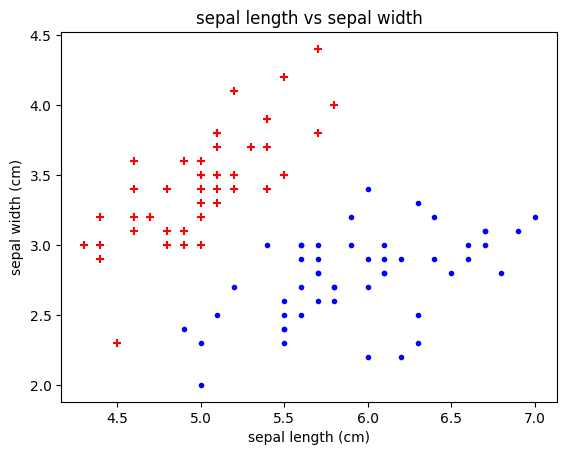

In [29]:
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'], color = 'red' , marker = '+')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'], color = 'blue' , marker = '.')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('sepal length vs sepal width')

###  petal length vs width of df0 and df1

Text(0.5, 1.0, 'petal length vs petal width')

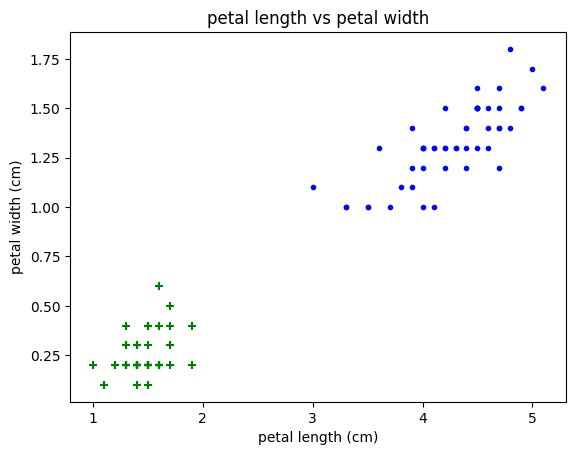

In [32]:
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'], color = 'green' , marker = '+')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'], color = 'blue' , marker = '.')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title('petal length vs petal width')

### Now lets train our model using sklearn

In [36]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


### now from the above columns we need to drop the target and flowername columns for X datasets

In [40]:
X = df.drop(['target','flower_name'], axis = 'columns')
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [42]:
y = df.target
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

### now lets split the datasets 

In [44]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [45]:
len(X_train)

120

In [46]:
len(X_test)

30

### model training using SVM (support vector machine) 

In [60]:
from sklearn.svm import SVC
model = SVC()  ## same result with  kernel='linear' 

In [61]:
model.fit(X_train, y_train)

SVC()

### now as our model is ready lets predict 

In [62]:
# lets check the accuracy of the model 
model.score(X_test,y_test)

0.9666666666666667

In [63]:
model.predict(X_test)

array([1, 0, 2, 2, 2, 0, 1, 0, 1, 2, 0, 2, 0, 0, 0, 1, 2, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 2])

In [64]:
model.predict([[4.8,3.0,1.5,0.3]])

C:\Users\Bibek\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])

**Tune Parameters**

**1. Regularistion(C)**

In [68]:
model_C = SVC(C=1)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.9666666666666667

**2. Gamma**

In [69]:
model_g = SVC(gamma=10)
model_g.fit(X_train, y_train)
model_g.score(X_test, y_test)

0.9333333333333333

**3. Kernel**

In [72]:
model_linear_kernel = SVC(kernel='linear')
model_linear_kernel.fit(X_train, y_train)
model_linear_kernel.score(X_test,y_test)

0.9666666666666667